Recreation of XYZeq_fig4_DE.html that Derek sent me [here](https://yelab.slack.com/archives/DFS1T99J4/p1584126927000900). I'm using the input files he used, which we talked about sending me (here)[https://yelab.slack.com/archives/DFS1T99J4/p1584649679001300] and which are located in Box under `2018-2019.XYSeq/data/20200319`. This is all for the goal of creating a version of the most recent L20C1 data that has the new annotated cell type (MSC).

In [1]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

import scanpy as sc

import scipy
scipy.__version__

sc.logging.print_versions()

In [60]:
path="/data/xyzeq/xyzeq/individual.raw.and.proc.h5ads/20200319/"

In [61]:
sc.settings.verbosity=3
sc.settings.set_figure_params(dpi=80)
sc.logging.print_versions()

#sc.settings = True

##load the data
adata=sc.read(path + 'matrix_mergedIntron.mtx', cache=False).T




# ##name the genes


adata.var_names = [gene.strip() for gene in open(path + 'genes_10x.tsv', 'r')]



# ##name the cells
adata.obs_names = [barcode.strip() for barcode in open(path + 'barcodes.tsv', 'r')] 

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.18.0 scipy==1.4.1 pandas==0.25.3 scikit-learn==0.22 statsmodels==0.10.1 python-igraph==0.7.1
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [62]:
adata.obs['barcode'] = adata.obs.index.str[-16:]

In [63]:
adata.var_names_make_unique()

In [64]:
adata=adata[adata.obs_names.str.contains('L20C1')]

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


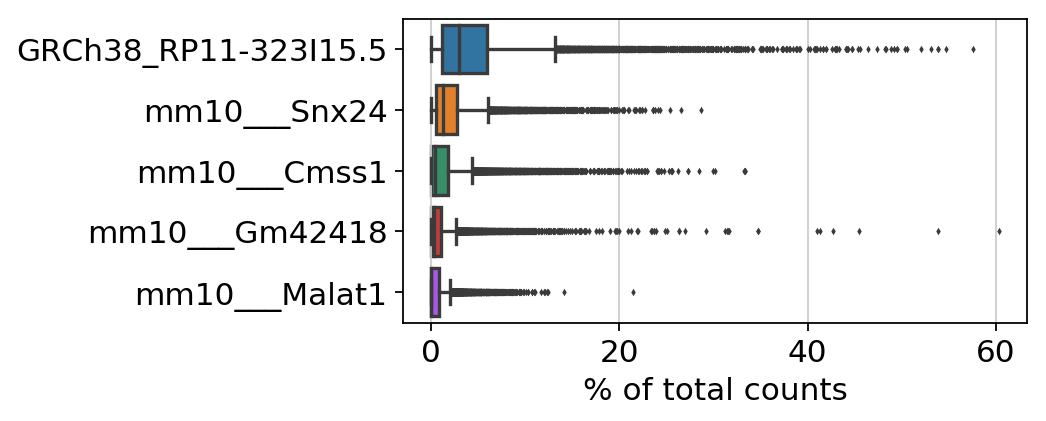

In [65]:
sc.pl.highest_expr_genes(adata, n_top=5) 

In [66]:
adata.obs['n_counts'] = adata.X.sum(axis=1)
adata.obs['log_counts'] = np.log10(adata.X.sum(axis=1))

mito_genes_mouse=[name for name in adata.var_names if name.startswith(('mm10___mt-'))]
mito_genes_human=[name for name in adata.var_names if name.startswith(('GRCh38_MT-'))] 

#mito_genes=[name for name in adata.var_names if name.startswith(('mm10_mt-', 'hg19_mt-', 'mt-'))]

##create new obs anotation to define percent mito for each cell 
adata.obs['percent_mito_mouse'] = np.sum(adata[:, mito_genes_mouse].X, axis=1) / np.sum(adata.X, axis=1)*100

adata.obs['percent_mito_human'] = np.sum(adata[:, mito_genes_human].X, axis=1) / np.sum(adata.X, axis=1)*100

Trying to set attribute `.obs` of view, making a copy.


In [67]:
sc.pp.filter_genes(adata, min_cells=1)

filtered out 66957 genes that are detectedin less than 1 cells


In [68]:
adata.var['log_cells']=np.log10(adata.var['n_cells'])
gene_meta=adata.var.sort_values(by='n_cells')

#gene_meta['gene']=list(range(1,54516))
#gene_meta.plot.scatter(x='gene',y='log_cells')

gene_meta_high=gene_meta[gene_meta['n_cells']>=5000]
gene_meta_high.plot.scatter(x='gene',y='n_cells')

KeyError: 'gene'

In [69]:
##post processing filter minimum UMIS and genes
sc.pp.filter_cells(adata, min_counts=500)#300

sc.pp.filter_cells(adata, min_genes=100)

#sc.pp.filter_cells(adata, max_counts=15000)
#sc.pp.filter_cells(adata, max_genes=2000) 

##post processing filter genes 
#sc.pp.filter_genes(adata, min_cells=2)
#sc.pp.filter_genes(adata, max_cells=8000)   

# ## define mito genes 
# mito_genes_mouse=[name for name in adata.var_names if name.startswith(('mm10___mt-'))]
                                                              
# mito_genes_human=[name for name in adata.var_names if name.startswith(('GRCh38_MT-'))]                                                                


# ##create new obs anotation to define percent mito for each cell 
# adata.obs['percent_mito'] = np.sum(adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)*100

# ##create new obs anotation to define UMIs per cell
# adata.obs['n_counts'] = adata.X.sum(axis=1)

filtered out 18293 cells that haveless than 500 counts
filtered out 3 cells that haveless than 100 genes expressed


normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


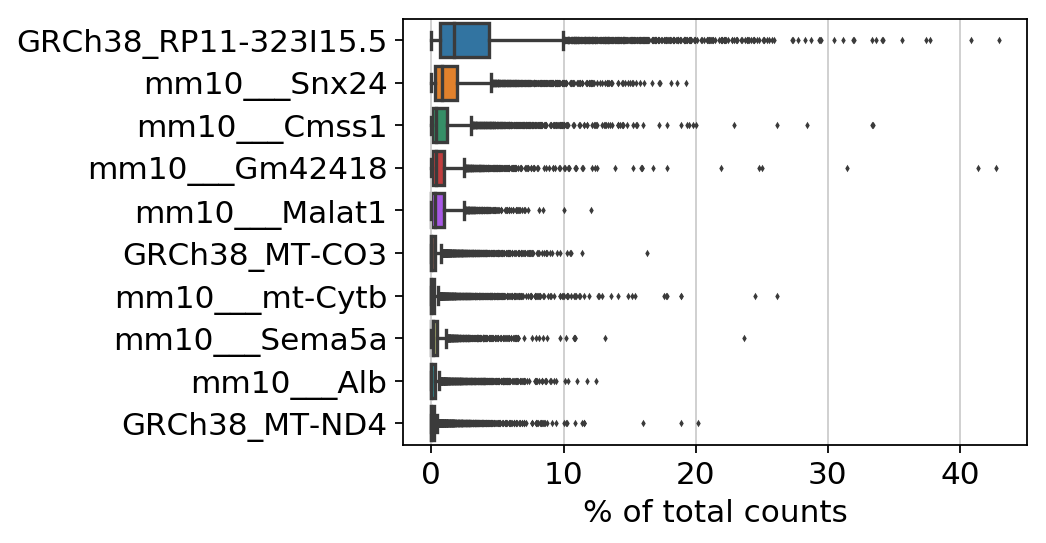

In [70]:
sc.pl.highest_expr_genes(adata, n_top=10) 

In [71]:
contaminating_genes=[
    
    'mm10___Ntrk2', 
    'GRCh38_SMC5',
    'mm10___4930570N18Rik',
    'mm10___mt-Nd2',
    'GRCh38_GLO1',
    'GRCh38_MALAT1',
    'mm10___Pebp4',
    'mm10___Apoe',
    'mm10___mt-Cytb',
    'mm10___Pigr', 
    'mm10___Trf',
    'mm10___Kif5c', 
    'GRCh38_XIST', 
    'GRCh38_COL19A1',
    'GRCh38_ANKRD30BL',
    'mm10___Camk1d',
    'GRCh38_LINC00486',
    'mm10___Alb',
    'GRCh38_SHF',
    'mm10___A530064D06Rik',
    'mm10___Galnt18', 
    'GRCh38_RP4-594L9.2',
    'mm10___Rnf152',
    'mm10___Malat1', 
    'mm10___Foxp4', 
    'mm10___Sema5a', 
    'mm10___Gm42418',
    'mm10___Cmss1', 
    'mm10___Snx24', 
    'GRCh38_RP11-323I15.5' 
    
]
                    
adata.obs['percent_contam'] = np.sum(adata[:, contaminating_genes].X, axis=1) / np.sum(adata.X, axis=1)*100

In [72]:
##filter out outliers

adata = adata[adata.obs['n_genes'] < 15000, :]
adata = adata[adata.obs['n_counts'] < 10000, :]
adata = adata[adata.obs['percent_mito_mouse'] < 1, :]

#adata = adata[adata.obs['percent_mito_human'] < 10, :]

In [73]:
#barnyard


mouse_genes=[name for name in adata.var_names if name.startswith('mm10_')]
#human_genes=[name for name in adata.var_names if name.startswith('GRCh38_')]

human_genes=[name for name in adata.var_names if name.startswith('GRCh38_')]


adata.obs['mouse_counts'] = np.sum(adata[:, mouse_genes].X, axis=1)
adata.obs['human_counts'] = np.sum(adata[:, human_genes].X, axis=1)

Trying to set attribute `.obs` of view, making a copy.


In [74]:
# # fig, ax = plt.subplots(figsize=(6, 1))
# fig.subplots_adjust(bottom=0.5)

cmap = mpl.colors.ListedColormap(['royalblue','lightgrey', 'orangered'])

In [76]:
np.seterr(divide = 'ignore') 
adata.obs['ratio'] = np.log10(np.true_divide(adata.obs['mouse_counts'], adata.obs['human_counts']))


def cell_call(counts):
        if counts['ratio'] > 0.66:
                return 'M'
        elif counts['ratio'] < -0.66:
                return 'H'
        else:
                return 'C'

adata.obs['cell_call']=adata.obs.apply(lambda counts: cell_call(counts), axis=1)

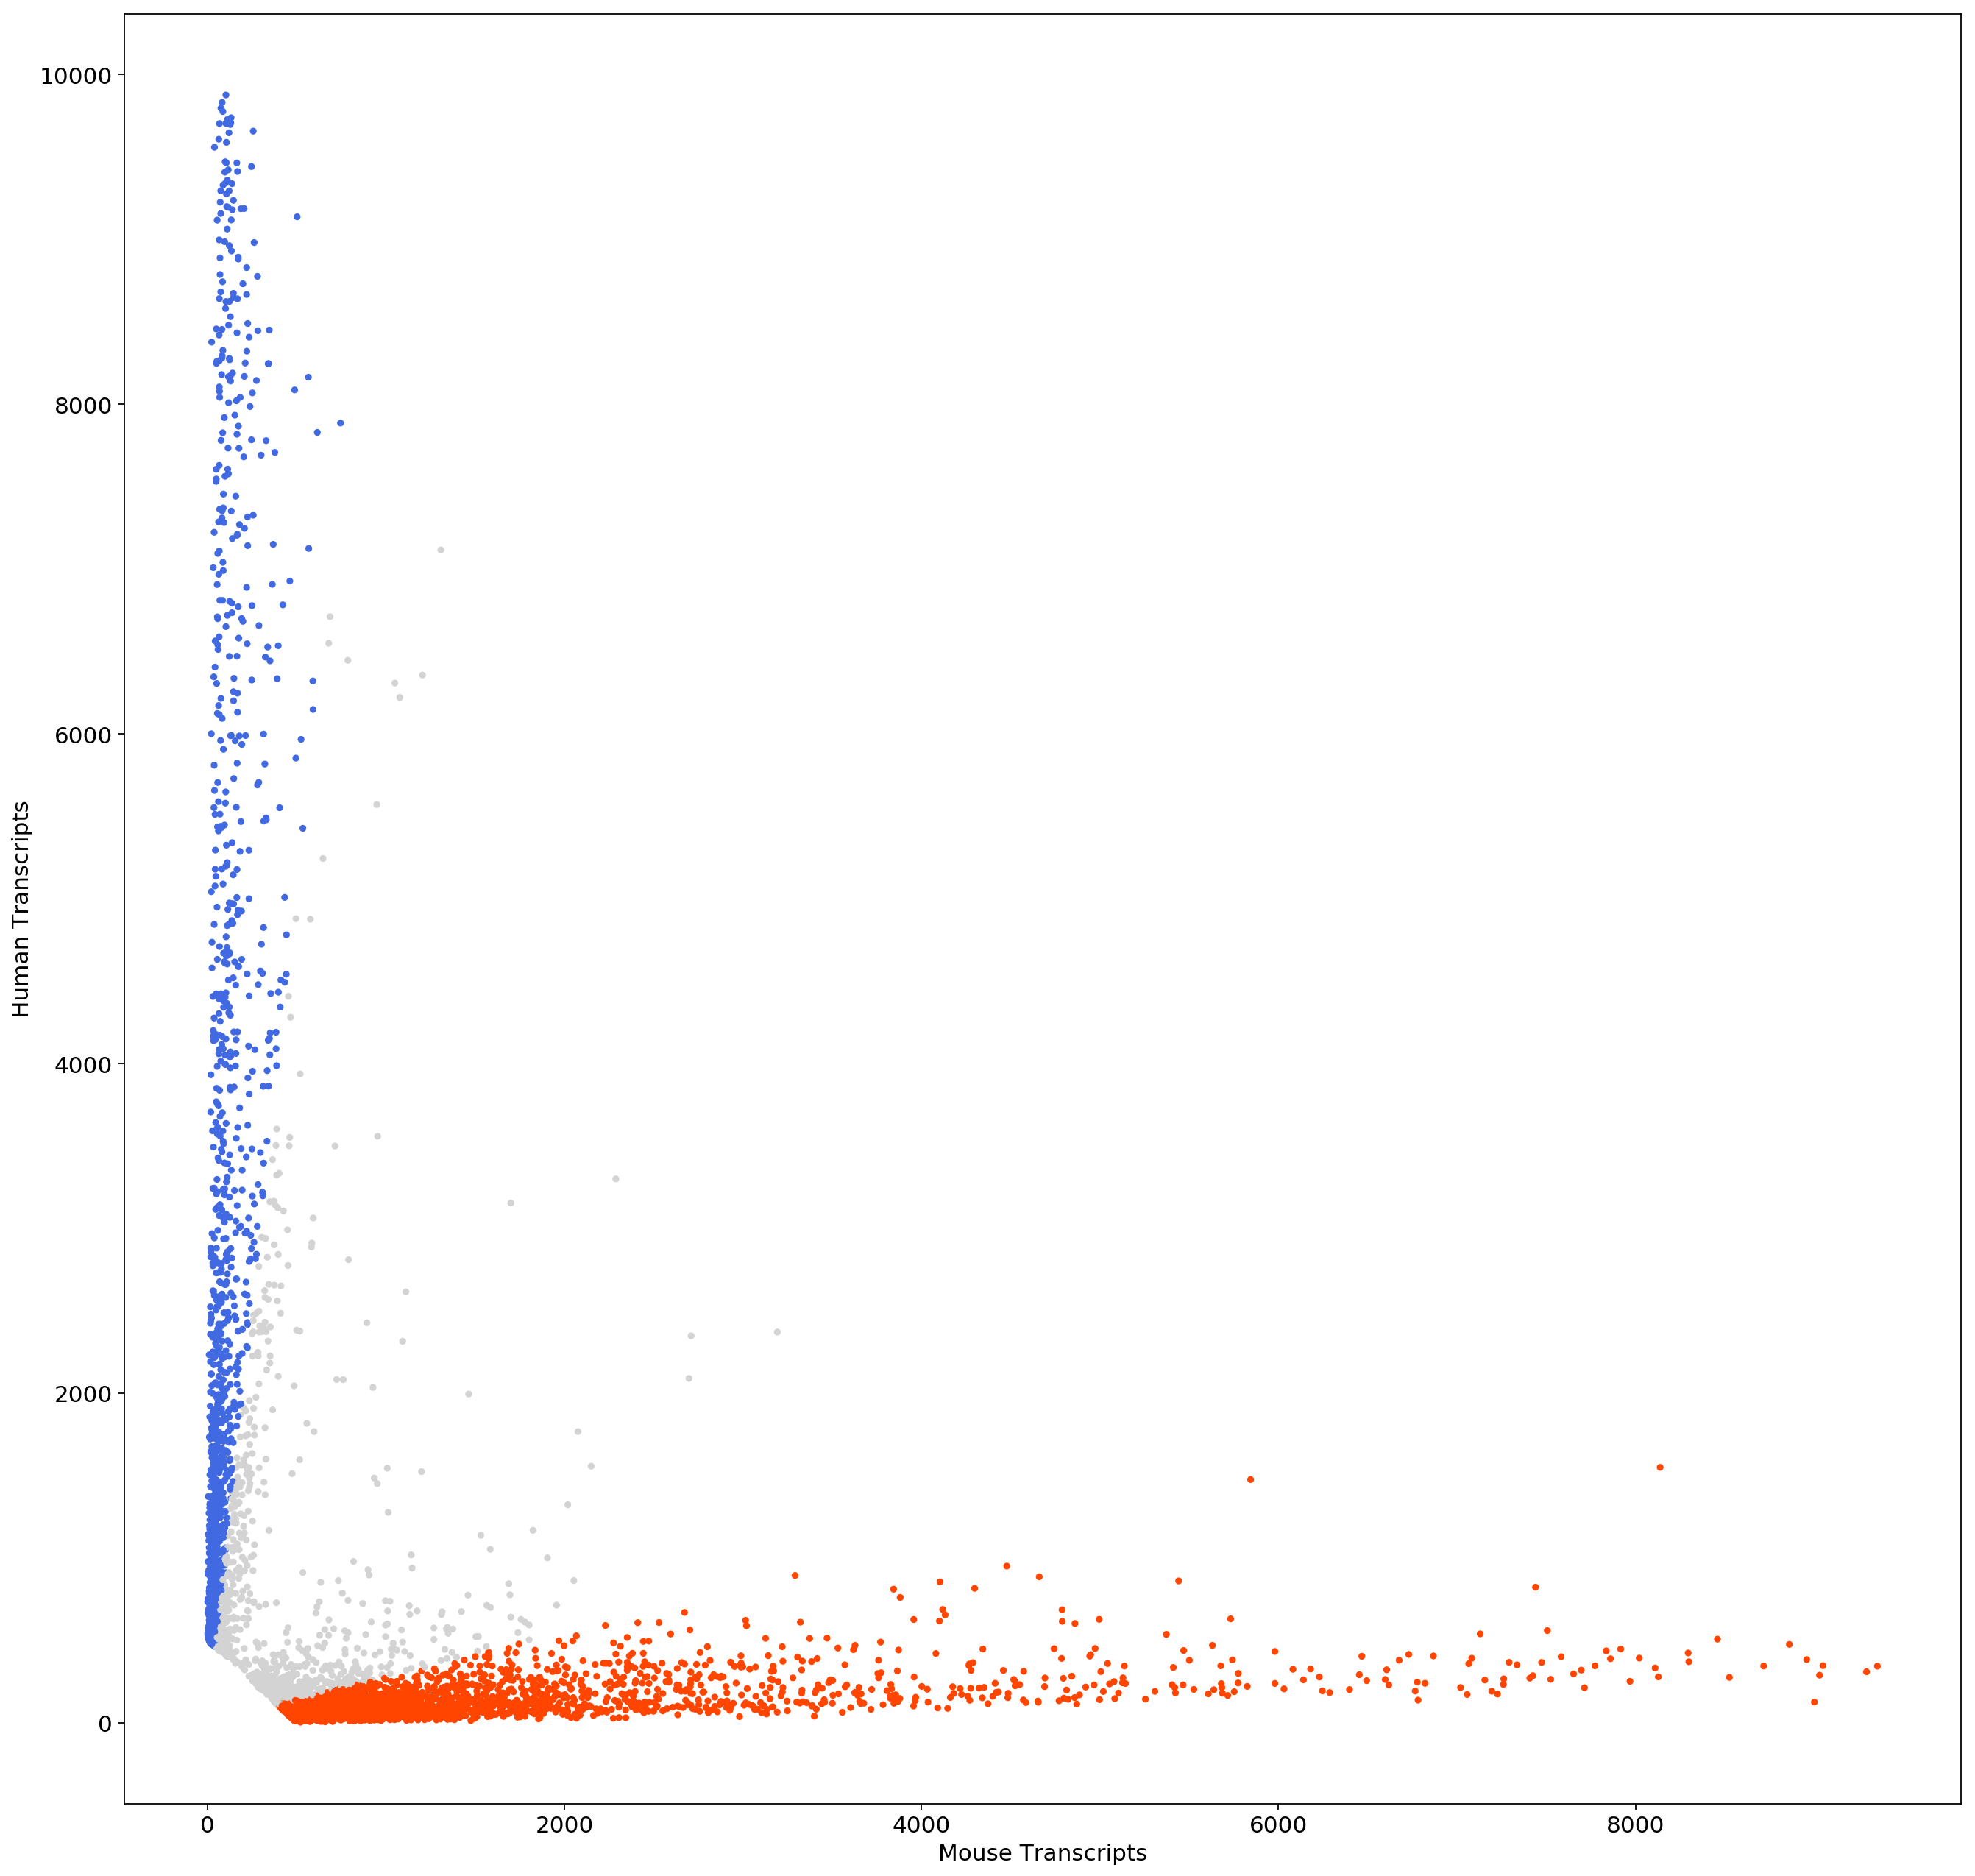

In [77]:
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(x=adata.obs['mouse_counts'], 
            y=adata.obs['human_counts'],
            s=10,
             c=adata.obs['ratio'],
           cmap=cmap
           )


plt.xlabel('Mouse Transcripts')
plt.ylabel('Human Transcripts')
plt.grid(b=False)

#plt.savefig('/Users/derekbogdanoff/Desktop/L20C1_barnyard.svg', bbox_inches='tight')

In [78]:
adata.obs['cell_call'].value_counts()

M    2389
H    1632
C     767
Name: cell_call, dtype: int64

In [79]:
##create raw data file

adata.raw = sc.pp.log1p(adata, copy=True)

In [80]:
##normalize counts per cell to 10K each 

sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


extracting highly variable genes
    finished (0:00:03)


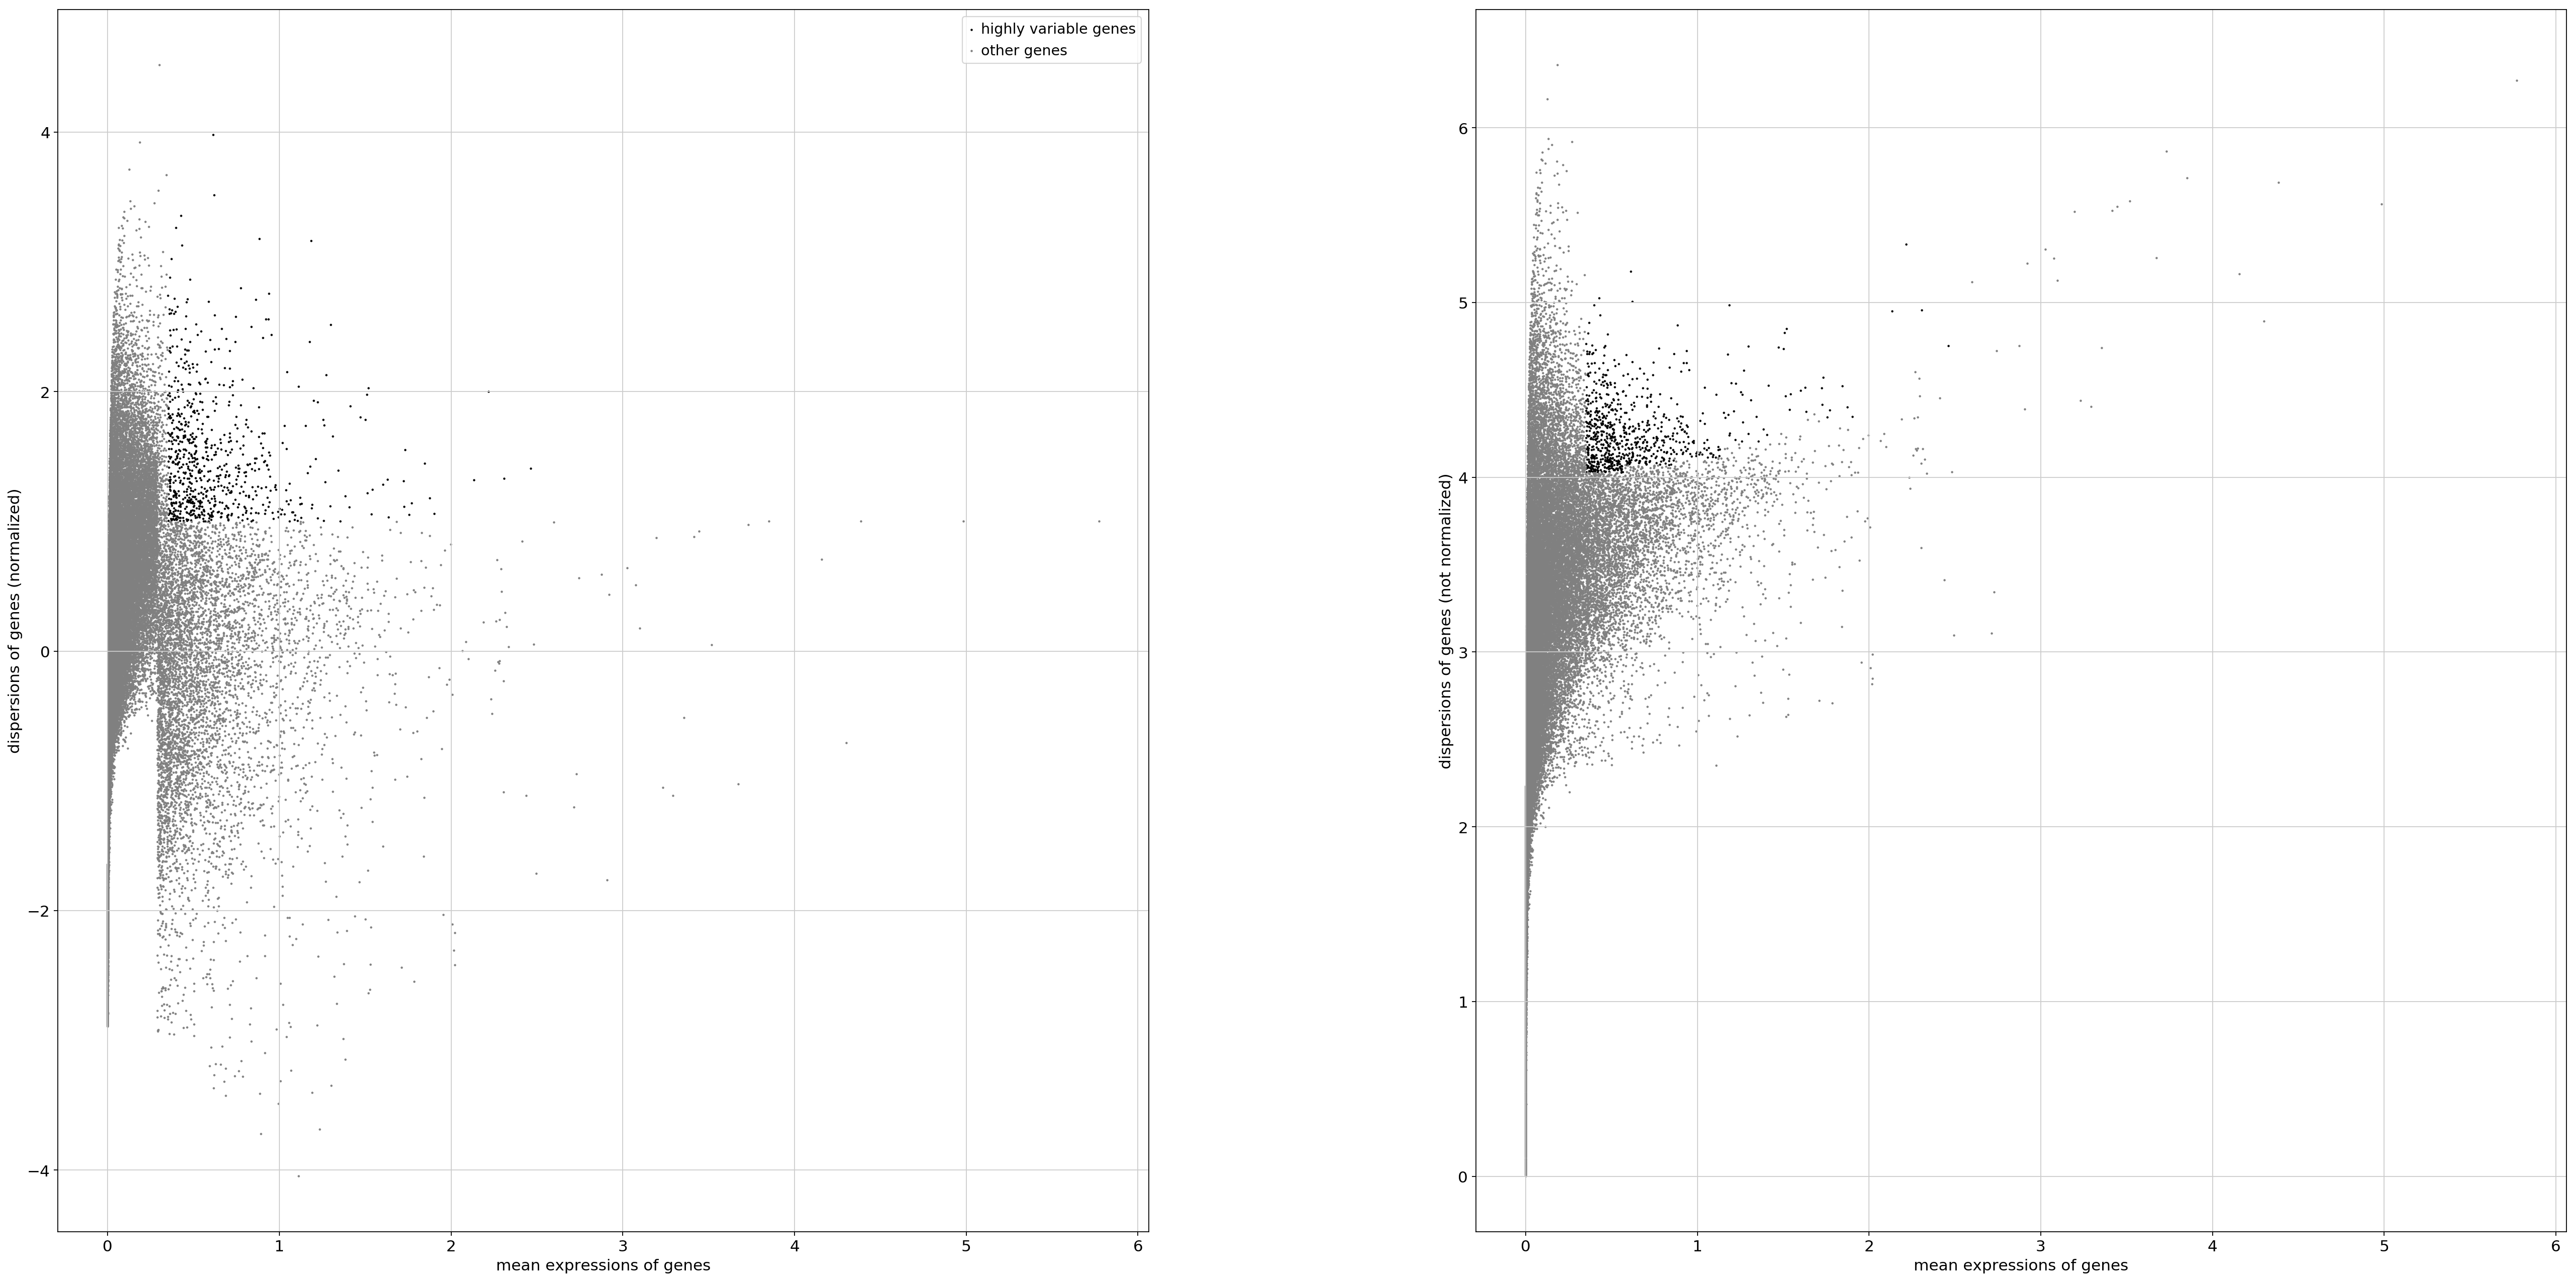

In [82]:
filter_result = sc.pp.filter_genes_dispersion(
    adata.X,
#    n_top_genes=2000
    min_mean=0.35,
    max_mean=7,
    min_disp=1
                                            ) 


####L20C1 parameters 

sc.pl.filter_genes_dispersion(filter_result)

In [83]:
adata = adata[:, filter_result.gene_subset]

In [84]:
sc.pp.log1p(adata)

/home/ghartoularos/anaconda3/envs/xyzeq/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:285: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(data)


In [85]:
#Regress out unwanted sources of variation
sc.pp.regress_out(adata, ['n_counts',
              #            'percent_mito_human',
                          'percent_mito_mouse',
              #            'percent_contam'
                         ], n_jobs=16)

regressing out ['n_counts', 'percent_mito_mouse']
    sparse input is densified and may lead to high memory use


... storing 'barcode' as categorical
... storing 'cell_call' as categorical


    finished (0:00:05)


Right after this, Derek scales the data. I need the unscaled data, so exporting here.

In [86]:
path = '/data/xyzeq/xyzeq/individual.raw.and.proc.h5ads/fig3.L20C1/new.adata.unscaled.h5ad'
adata.write_h5ad(path)
# adata = sc.read_h5ad(path)